<a href="https://colab.research.google.com/github/sachhinrao3/TechSim-MLOps-IIT-Kharagpur-/blob/main/Mask_NoMask_with_transfer_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.utils import to_categorical

from imutils import paths
import cv2
import progressbar
import numpy as np
import os

In [6]:
!wget https://www.techsimplus.com/media/Mask_noMask.zip

--2020-12-11 11:07:28--  https://www.techsimplus.com/media/Mask_noMask.zip
Resolving www.techsimplus.com (www.techsimplus.com)... 159.65.158.156
Connecting to www.techsimplus.com (www.techsimplus.com)|159.65.158.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53354042 (51M) [application/zip]
Saving to: ‘Mask_noMask.zip.1’

Mask_noMask.zip.1   100%[===================>]  50.88M  10.0MB/s    in 6.3s    

2020-12-11 11:07:36 (8.13 MB/s) - ‘Mask_noMask.zip.1’ saved [53354042/53354042]



In [7]:
!unzip Mask_noMask.zip 

Archive:  Mask_noMask.zip
replace dataset/with_mask/0-with-mask.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
input_shape = (224, 224)
proprocess = preprocess_input

In [9]:
dir = 'dataset/'

mask_dir = dir + 'with_mask/'
no_mask_dir = dir + 'without_mask/'

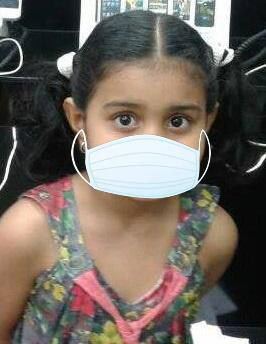

In [10]:
from PIL import Image
Image.open('dataset/with_mask/112-with-mask.jpg')

In [11]:
### Load all the images on Notebook to prepare them and train the model

mask_images = os.listdir(mask_dir)
no_mask_images = os.listdir(no_mask_dir)

In [66]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3))))   ## by these argument we romoved our model flatten, top, dense layer

In [13]:
#  basemodel.summary()

In [67]:
## Normalize the data
generator = ImageDataGenerator(1/255)

train_data_gen = generator.flow_from_directory(dir, batch_size=32, target_size=(224,224), class_mode='categorical')

Found 1376 images belonging to 2 classes.


In [68]:
train_data_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [69]:
train_data_gen.classes.shape

(1376,)

In [70]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(524, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(2, activation='softmax')(headmodel)

In [71]:
model = Model(inputs= basemodel.input, outputs= headmodel)

In [72]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [73]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
model.fit(train_data_gen, epochs=10)

Model is gong to train..........
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


43/43 [==============================] - 5s 112ms/step - loss: 5.2868 - accuracy: 0.9506
Epoch 2/10
43/43 [==============================] - 5s 109ms/step - loss: 2.0496 - accuracy: 0.9876
Epoch 3/10
43/43 [==============================] - 5s 110ms/step - loss: 2.6091 - accuracy: 0.9913
Epoch 4/10
43/43 [==============================] - 5s 109ms/step - loss: 2.1043 - accuracy: 0.9935
Epoch 5/10
43/43 [==============================] - 5s 111ms/step - loss: 2.4434 - accuracy: 0.9906
Epoch 6/10
43/43 [==============================] - 5s 108ms/step - loss: 1.0044 - accuracy: 0.9956
Epoch 7/10
43/43 [==============================] - 5s 108ms/step - loss: 3.2669 - accuracy: 0.9927
Epoch 8/10
43/43 [==============================] - 5s 111ms/step - loss: 1.1344 - accuracy: 0.9978
Epoch 9/10
43/43 [==============================] - 5s 111ms/step - loss: 2.4131 - accuracy: 0.9964
Epoch 10/10
43/43 [==============================] - 5s 110ms/step - loss: 0.5934 - accuracy: 0.9978


In [75]:
model.save('Mask_NoMask_model.h5')

In [34]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg&usqp=CAU -O withoutmask_image1.jpeg

/bin/bash: -O: command not found
--2020-12-11 11:32:08--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.79.139, 173.194.79.100, 173.194.79.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3307 (3.2K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg’

images?q=tbn:ANd9Gc 100%[===================>]   3.23K  --.-KB/s    in 0s      

2020-12-11 11:32:08 (77.4 MB/s) - ‘images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg’ saved [3307/3307]



In [55]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ&usqp=CAU

--2020-12-11 11:46:12--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.138, 108.177.119.139, 108.177.119.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8539 (8.3K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ’

images?q=tbn:ANd9Gc 100%[===================>]   8.34K  --.-KB/s    in 0s      

2020-12-11 11:46:12 (102 MB/s) - ‘images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ’ saved [8539/8539]



In [63]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA&usqp=CAU

--2020-12-11 11:49:35--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.100, 108.177.119.113, 108.177.119.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7574 (7.4K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA’

images?q=tbn:ANd9Gc 100%[===================>]   7.40K  --.-KB/s    in 0s      

2020-12-11 11:49:35 (103 MB/s) - ‘images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA’ saved [7574/7574]



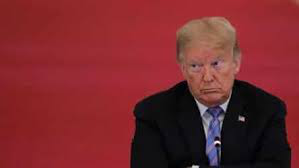

In [76]:
Image.open("/content/images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg")

In [77]:
image = cv2.imread('/content/images?q=tbn:ANd9GcS6Jp10p-PTnXjh6qwbcXEJBF6EZ_A1Qr0Yzg')
image = cv2.resize(image, (224,224))
image = image.astype('float')/255
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

## lets make some prediction on images
pred = model.predict(image)
pred = pred[0]
with_mask, without_mask = pred
if with_mask > without_mask:
    print("He is a responsible citizen_@@@@@@...")
else:
    print("Please wear a mask/......")
print(pred)

Please weear a mask/......
[1.20609606e-04 9.99879360e-01]


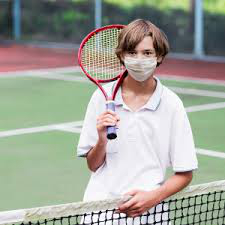

In [78]:
Image.open('/content/images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ')

In [83]:
image = cv2.imread('/content/images?q=tbn:ANd9GcS0k5nLluicdzgkdwGT6IJ-TkGiWT85ee3DBQ')
image = cv2.resize(image, (224,224))
image = image.astype('float')/255
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

## lets make some prediction on images
pred = model.predict(image)
pred = pred[0]
with_mask, without_mask = pred
if with_mask > without_mask:
    print("He is a responsible citizen_@@@@@@...")
else:
    print("Please wear a mask/......")
print(pred)

Please wear a mask/......
[1.6517524e-06 9.9999833e-01]


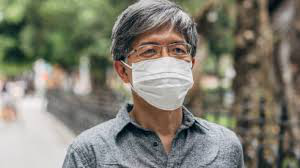

In [80]:
Image.open('/content/images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA')

In [82]:
image = cv2.imread('/content/images?q=tbn:ANd9GcRfVZyfFZ_XC0cLHKtk9rPO_KGPsiA4K8LjtA')
image = cv2.resize(image, (224,224))
image = image.astype('float')/255
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

## lets make some prediction on images
pred = model.predict(image)
pred = pred[0]
with_mask, without_mask = pred
if with_mask > without_mask:
    print("He is a responsible citizen_@@@@@@...")
else:
    print("Please wear a mask/......")
print(pred)

He is a responsible citizen_@@@@@@...
[0.879499   0.12050095]
